In [119]:
import pandas as pd
import numpy as np
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as pl

In [120]:
genes=['gene'+str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [121]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [123]:
data.loc[['gene1','gene6'],'wt1':'wt5']

,wt1,wt2,wt3,wt4,wt5
gene1,11,9,7,12,11
gene6,664,642,612,663,692


In [124]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,11,9,7,12,11,598,553,576,584,630
gene2,576,618,601,599,625,96,86,90,102,80
gene3,30,20,29,23,30,845,913,850,871,886
gene4,808,881,854,847,882,646,637,656,694,651
gene5,60,33,45,58,44,304,309,293,309,269
...,...,...,...,...,...,...,...,...,...,...
gene96,875,842,869,893,897,327,357,314,318,355
gene97,95,102,94,103,84,691,705,672,719,673
gene98,85,80,93,79,82,407,418,393,425,437
gene99,351,411,390,395,345,268,247,248,254,270


In [125]:
# or we can also generate rando, numbers like this
a=np.random.randint(10,1000,(100,10))
pd.DataFrame(a,columns=[*wt,*ko],index=genes)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,707,881,382,375,481,367,183,645,167,497
gene2,987,118,960,328,995,321,205,228,333,477
gene3,400,410,145,281,141,27,572,709,692,631
gene4,855,741,121,871,81,32,512,592,842,532
gene5,750,480,835,486,256,999,368,511,833,713
...,...,...,...,...,...,...,...,...,...,...
gene96,551,82,459,230,367,440,544,242,694,544
gene97,962,921,822,896,733,952,402,882,47,737
gene98,202,741,34,720,893,426,815,745,356,314
gene99,839,891,308,501,847,678,216,248,653,45


C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


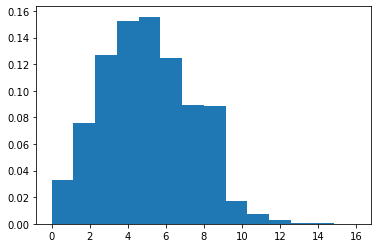

In [126]:
import numpy as np
s = np.random.poisson(5, 10000)
# Display histogram of the sample:

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

In [127]:
data.shape

(100, 10)

In [128]:
scaled_data=preprocessing.scale(data.T)

In [129]:
scaled_data.shape

(10, 100)

In [130]:
# after scaling mean for each column is 0 and std deviation is 1
scaled_data.mean(axis=1),scaled_data.std(axis=1)

(array([-0.06422993, -0.00754437,  0.00788812, -0.02040104, -0.07258956,
         0.06538288, -0.02056708,  0.0657507 ,  0.05250551, -0.00619522]),
 array([1.01391793, 0.98457736, 0.9855353 , 1.05424795, 0.98740932,
        0.97616461, 0.9923263 , 1.01641803, 0.99900007, 0.97694432]))

In [131]:
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [132]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

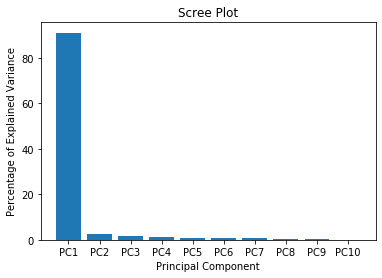

In [133]:
pl.bar(range(10),per_var,tick_label=labels)
pl.xlabel('Principal Component')
pl.ylabel('Percentage of Explained Variance')
pl.title('Scree Plot')
pl.show()

# Here PCA1 and PCA2 can do a god job to represent the original data

In [134]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)

In [135]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.733384,-1.383226,-0.602226,0.374341,1.707762,-1.308116,1.017393,0.543744,0.319781,7.771561e-16
wt2,9.255254,-1.124580,2.710374,-0.767049,-0.500689,-0.782709,-0.919388,-0.605217,0.105710,-6.661338e-16
wt3,9.392627,-1.626107,-0.762188,-0.831981,-0.987989,1.805598,0.139506,0.811142,0.285820,-9.992007e-16
wt4,9.924401,2.664391,-1.672695,-1.186436,0.570814,-0.133917,-0.831966,-0.364754,-0.467194,1.110223e-16
wt5,9.403770,1.440059,0.430832,2.433143,-0.821702,0.452102,0.585168,-0.371851,-0.232137,-2.553513e-15
ko1,-9.443296,0.235349,0.199630,-1.256673,-0.460675,-0.003903,1.969058,-0.856260,-0.210498,3.996803e-15
ko2,-9.579062,1.798548,-0.399627,0.083057,-0.995489,-0.861622,-0.360505,0.489828,1.118195,-2.775558e-15
ko3,-9.725454,0.869186,1.499427,0.190120,1.936053,1.484302,-0.342265,0.135957,0.177293,4.329870e-15
ko4,-9.393842,-2.468656,-1.750269,0.809206,0.053489,0.024842,-0.943765,-1.060361,-0.021871,5.551115e-16
ko5,-9.567782,-0.404966,0.346741,0.152272,-0.501573,-0.676576,-0.313236,1.277773,-1.075099,-3.330669e-16


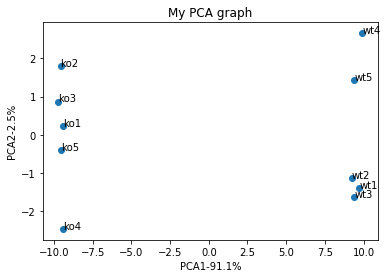

In [136]:
pl.scatter(pca_df.PC1,pca_df.PC2)
pl.title('My PCA graph')
pl.xlabel('PCA1-{0}%'.format(per_var[0]))
pl.ylabel('PCA2-{0}%'.format(per_var[1]))
for sample in pca_df.index:
    pl.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

In [141]:
loadin_scores=pd.Series(pca.components_[0],index=genes)
loadin_scores

gene1     -0.104538
gene2      0.104572
gene3     -0.104666
gene4      0.101684
gene5     -0.104080
             ...   
gene96     0.104555
gene97    -0.104609
gene98    -0.104503
gene99     0.099635
gene100    0.104146
Length: 100, dtype: float64

In [143]:
sorted_loading_scores=loadin_scores.abs().sort_values(ascending=False)

In [148]:
top10genes=sorted_loading_scores[:10].index.values

In [149]:
top10genes

array(['gene65', 'gene17', 'gene30', 'gene35', 'gene3', 'gene87',
       'gene56', 'gene55', 'gene97', 'gene84'], dtype=object)